In [1]:
import uniport as up
import scanpy as sc

In [2]:
adata_merfish = sc.read_h5ad('MERFISH/MERFISH.h5ad')
adata_rna = sc.read_h5ad('MERFISH/RNA.h5ad')
adata_cm = sc.read_h5ad('MERFISH/MERFISH_and_RNA.h5ad')

In [3]:
adatas = [adata_merfish, adata_rna]

In [4]:
adata = up.Run(adatas=adatas, adata_cm=adata_cm, lambda_kl=5.0)

Dataset 0: MERFISH
AnnData object with n_obs × n_vars = 64373 × 155
    obs: 'cell_type', 'domain_id', 'source'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'
Dataset 1: RNA
AnnData object with n_obs × n_vars = 30370 × 2000
    obs: 'cell_type', 'domain_id', 'source'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'
Reference dataset is dataset 1


Data with common HVG
AnnData object with n_obs × n_vars = 94743 × 153
    obs: 'cell_type', 'domain_id', 'source'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p'




2022-05-08 11:08:10,803 - root - INFO - model
VAE(
  (encoder): Encoder(
    (enc): ModuleList(
      (0): NN(
        (net): ModuleList(
          (0): Block(
            (fc): Linear(in_features=153, out_features=1024, bias=True)
            (norm): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (act): ReLU()
          )
        )
      )
    )
    (mu_enc): ModuleList(
      (0): NN(
        (net): ModuleList(
          (0): Block(
            (fc): Linear(in_features=1024, out_features=16, bias=True)
          )
        )
      )
    )
    (var_enc): ModuleList(
      (0): NN(
        (net): ModuleList(
          (0): Block(
            (fc): Linear(in_features=1024, out_features=16, bias=True)
          )
        )
      )
    )
  )
  (decoder): Decoder(
    (dec): ModuleList(
      (0): NN(
        (net): ModuleList(
          (0): Block(
            (fc): Linear(in_features=16, out_features=153, bias=True)
            (norm): DSBatc

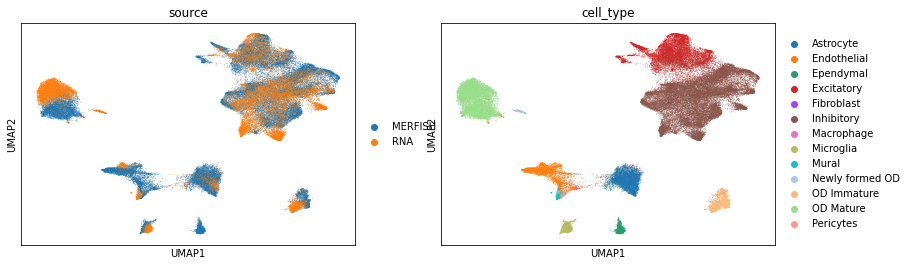

In [5]:
sc.pp.neighbors(adata, use_rep='latent')
sc.tl.umap(adata, min_dist=0.1)
sc.pl.umap(adata, color=['source', 'cell_type'])